

As usual, we import the relevant libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Next, we import the Iris data from sklearn.datasets. I have printed out the feature names so I could label the 3-d plot. I have also printed out the correlation matrix and as in previous examples see that petal length and petal width are highly correlated, 96%. Sepal length is also highly correlated with these features (81.7%).

In [2]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.

y = iris.target
target_names=list(iris.target_names)
print(target_names)
df = pd.DataFrame({'Xsl':X[:,0],'Xsw':X[:,1],'Xpl':X[:,3],'Xpw':X[:,3],'y':y})
print(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


['setosa', 'versicolor', 'virginica']
     Xsl  Xsw  Xpl  Xpw  y
0    5.1  3.5  0.2  0.2  0
1    4.9  3.0  0.2  0.2  0
2    4.7  3.2  0.2  0.2  0
3    4.6  3.1  0.2  0.2  0
4    5.0  3.6  0.2  0.2  0
..   ...  ...  ...  ... ..
145  6.7  3.0  2.3  2.3  2
146  6.3  2.5  1.9  1.9  2
147  6.5  3.0  2.0  2.0  2
148  6.2  3.4  2.3  2.3  2
149  5.9  3.0  1.8  1.8  2

[150 rows x 5 columns]


The next thing we will do is create a plot showing the various flower types and how their sepal length and sepal widths relate to each other.

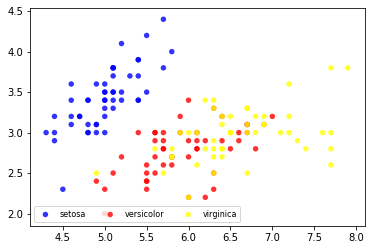

In [3]:
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
groups=("1","2","3")
fig, ax = plt.subplots()

setosa=plt.scatter(df.loc[df['y']==0,'Xsl'].values, df.loc[df['y']==0,'Xsw'].values,alpha=0.8, c='blue', edgecolors='none', s=30)
versicolor=plt.scatter(df.loc[df['y']==1,'Xsl'].values, df.loc[df['y']==1,'Xsw'].values,alpha=0.8, c='red', edgecolors='none', s=30)
virginica=plt.scatter(df.loc[df['y']==2,'Xsl'].values, df.loc[df['y']==2,'Xsw'].values,alpha=0.8, c='yellow', edgecolors='none', s=30)

plt.legend((setosa, versicolor, virginica),
           ('setosa', 'versicolor', 'virginica'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)


We can see that setosa is easy to differentiate with these 2 variables, however, the others are quite "close" to each other.

[]

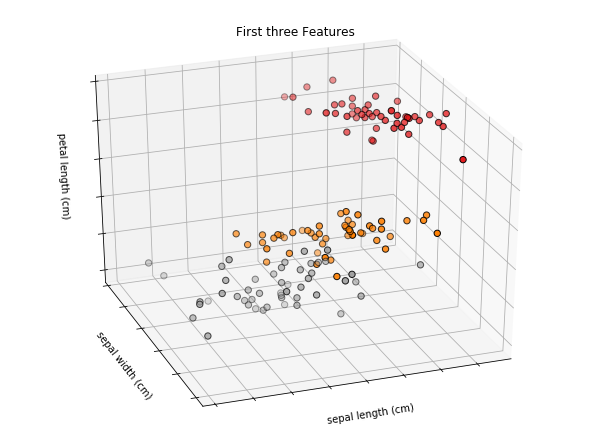

In [4]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three Features")
ax.set_xlabel("sepal length (cm)")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal width (cm)")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal length (cm)")
ax.w_zaxis.set_ticklabels([])

The 3-d plot doesn't show us much more even though we can see petal length might help a little.

The following piece of code is something you should probably do if you are trying to determine the value of k. In our case we know it is 3 but look at how the graph below. The "elbow" of the curve tells us the optimum number of clusters is either 3. The point where the curve flattens out. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (within-cluster sum of squares (WCSS)). As the number of clusters increases, we expect the WCSS to reduce at a slower rate. The "elbow" really tells us the value of k where the WCSS is not reducing substantially.

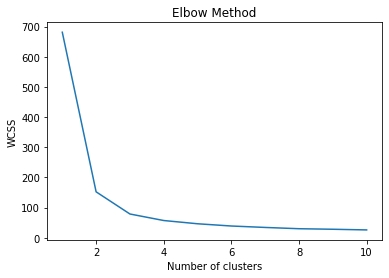

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now compare the clusters from the actual y values with the Kmeans predicted y values in the 2 graphs below. The cluster numbers will be different. Kmeans is just telling that certain rows belong to specific clusters.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


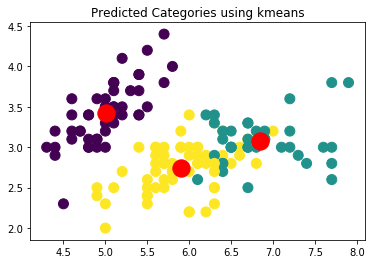

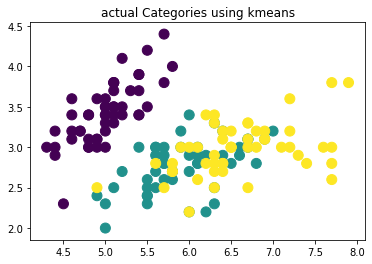

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
print(pred_y)
print(y)
pred_y = np.where(pred_y == 1,3 , pred_y)
pred_y = np.where(pred_y == 2,4 , pred_y)
pred_y = np.where(pred_y == 0,5 , pred_y)
pred_y=pred_y-3
plt.scatter(X[:,0], X[:,1],s=100, c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Predicted Categories using kmeans')
plt.show()
plt.title('actual Categories using kmeans')
plt.scatter(X[:,0], X[:,1],s=100, c=y)
plt.show()

Finally, we have printed out the confusion matrix.
Play with the above code and see if you can get it to work on another dataset. As usual, leave your thought on the comments board.

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]], dtype=int64)